# Monoidal Rips: A Stable Filtration for Weighted Directed Graphs

In this notebook, we will compute persistent homology of point clouds and weighted directed graphs using the $p$-Rips filtration.

In [70]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from gudhi import plot_persistence_diagram
from prips import filtration_from_array, filtration_from_graph, compute_persistence

## Computing the $p$-Rips persistent homology of a point cloud

We start by sampling $n$ random points on the unit circle in $\mathbb{R}^2$ with some normal distributed noise added.

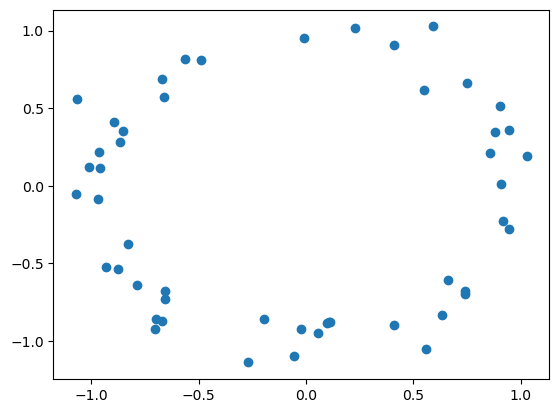

In [71]:
n = 50
thetas = np.random.uniform(0, 2 * np.pi, n)
X = np.c_[np.sin(thetas), np.cos(thetas)] + np.random.normal(0, 1e-1, size=(n, 2))
plt.scatter(X[:,0], X[:,1])
plt.show()

To compute the $p$-Rips filtration from our point cloud $X$, we can use the `filtration_from_array()` function. The distances are computed using the $q$-norm in $\mathbb{R}^2$. We will use the Euclidean distance in this example by setting $q=2$. The filtration will include simplicies of dimensions up to and including the number given by the `max_dim` argument. Let us compute both the $1$-Rips and $\infty$-Rips filtration of the (complete graph with vertices in the) point cloud.

In [72]:
q = 2
filtration_p_1 = filtration_from_array(X, p=1, q=q, max_dim=2)
filtration_p_inf = filtration_from_array(X, p=np.inf, q=q, max_dim=2)

We can now compute the persistent homology of each filtration using the `compute_persistence()` function.

In [73]:
pers_diag_p_1 = compute_persistence(filtration_p_1)
pers_diag_p_inf = compute_persistence(filtration_p_inf)

Lastly, let us visualize the persistence diagrams corresponding to the two different filtrations.

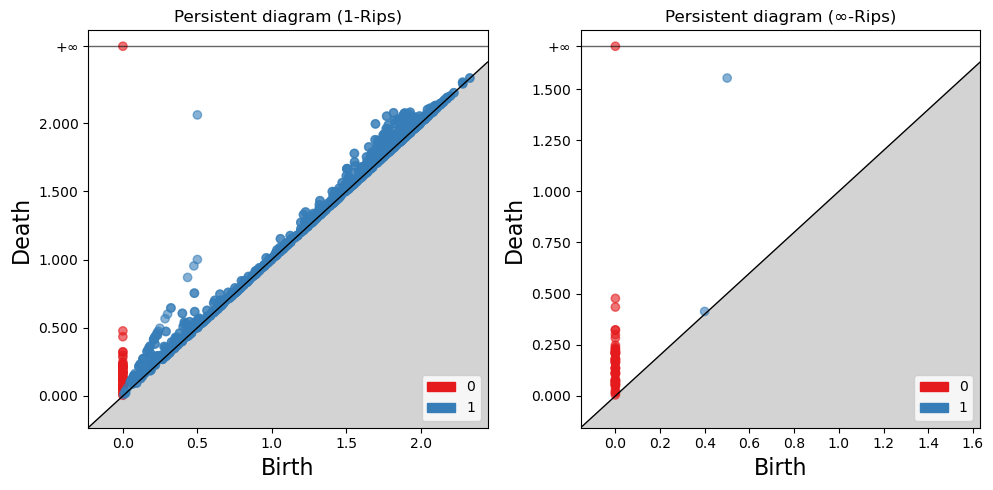

In [74]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
plot_persistence_diagram(pers_diag_p_1, axes = ax[0])
plot_persistence_diagram(pers_diag_p_inf, axes = ax[1])
ax[0].set_title("Persistent diagram (1-Rips)")
ax[1].set_title("Persistent diagram (∞-Rips)")
fig.tight_layout()
plt.show()

## Computing the $p$-Rips persistent homology of weighted directed graph

Computing the $p$-Rips persistence of a weighted directed graph is done similarly to the case of point clouds. The only difference is that we instead of `filtration_from_array()` now use the `filtration_from_graph()` function for creating our filtration. But first, let us create a random graph to demonstrate on. We will generate an Erdős-Rényi random directed graph using a built-in generator from `networkx` and randomly assign weights to the edges.

In [81]:
n = 50
G = nx.generators.random_graphs.fast_gnp_random_graph(n, 0.1, directed=True)
edge_weights = {e: np.random.uniform(0, 1) for e in G.edges()}
nx.set_edge_attributes(G, values = edge_weights, name = 'weight')

Let us visualize the graph with edge colors indicating the weights.

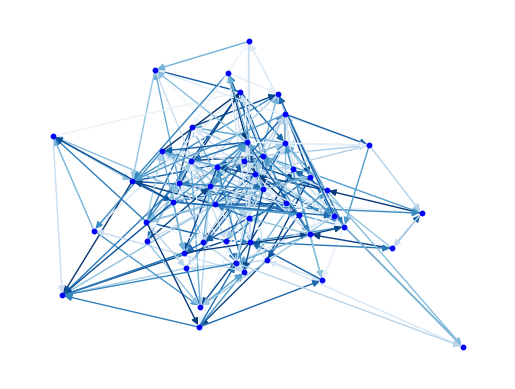

In [82]:
fig, ax = plt.subplots()
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, node_size=10, arrows=True, edge_cmap=plt.cm.Blues, ax=ax)
plt.show()

We will now compute the $p$-Rips filtrations of $G$ with $p=1, 5, \infty$. The function `filtration_from_graph()` expects a adjacency $A$ matrix as input so we need to create this. We set all entries corresponding to edges not included in the graph to $\infty$. We also set the vertex weights to $0$ for simplicity though any non-negative vertex weight is supported by the $p$-Rips filtration.

In [83]:
def digraph_to_matrix(G: nx.DiGraph) -> np.ndarray:
    A = nx.to_numpy_array(G, nonedge=np.inf)
    np.fill_diagonal(A, 0)
    return A

A = digraph_to_matrix(G)
filtration_p_1 = filtration_from_graph(A, p=1)
filtration_p_5 = filtration_from_graph(A, p=5)
filtration_p_inf = filtration_from_graph(A, p=np.inf)

At last, let us compute the persistent homology of each filtration and plot the persistent diagrams for comparison.

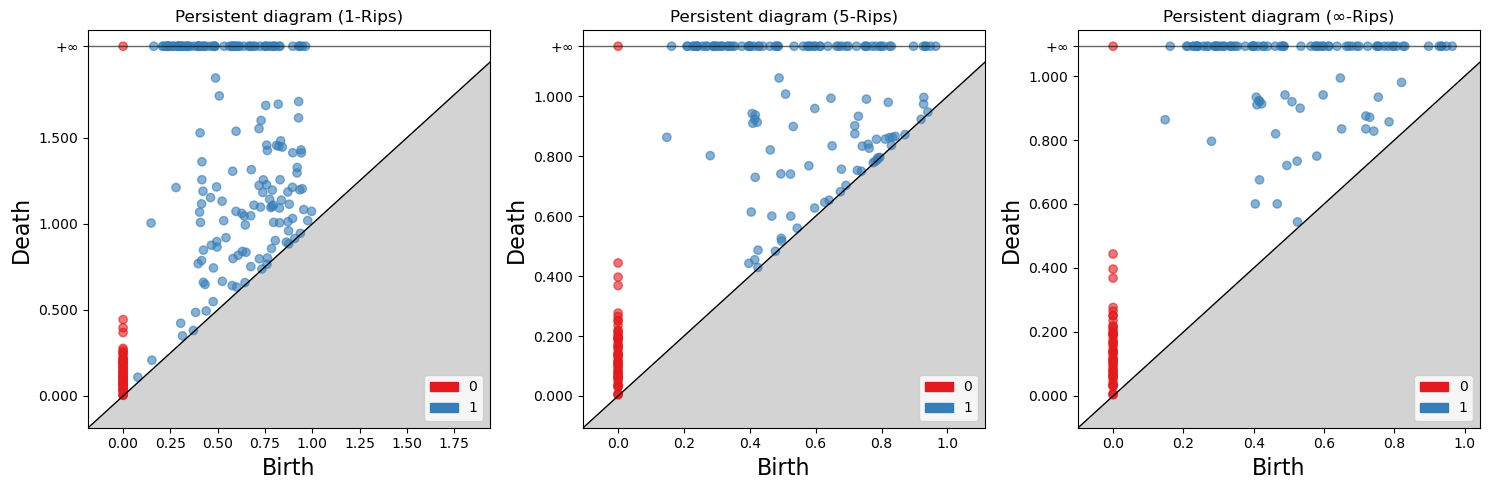

In [84]:
pers_diag_p_1 = compute_persistence(filtration_p_1)
pers_diag_p_5 = compute_persistence(filtration_p_5)
pers_diag_p_inf = compute_persistence(filtration_p_inf)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
plot_persistence_diagram(pers_diag_p_1, axes = ax[0])
plot_persistence_diagram(pers_diag_p_5, axes = ax[1])
plot_persistence_diagram(pers_diag_p_inf, axes = ax[2])
ax[0].set_title("Persistent diagram (1-Rips)")
ax[1].set_title("Persistent diagram (5-Rips)")
ax[2].set_title("Persistent diagram (∞-Rips)")
fig.tight_layout()
plt.show()

## Final Discussion

In this notebook we demonstrated how to compute the $p$-Rips persistence of point clouds and weighted directed graphs using our implementation. The resulting persistence diagrams can be further used in various tasks where topological descriptors of graphs might be useful.